# Heart Disease Prediction

In [187]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import keras


In [188]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

### 1. Importing the Dataset

The dataset is available at http:////archive.ics.uci.edu/ml/datasets/Heart+Disease.

We used the processed data collected Cleveland Clinic Foundation.

To import the necessary data, we will use pandas' built in read_csv() function.

In [189]:
# import the heart disease dataset
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

# the names will be the names of each column in our pandas DataFrame
names = ['age',
        'sex',
        'cp',
        'trestbps',
        'chol',
        'fbs',
        'restecg',
        'thalach',
        'exang',
        'oldpeak',
        'slope',
        'ca',
        'thal',
        'class']

# read the csv
cleveland = pd.read_csv(url, names=names)

In [190]:
# print the shape of the DataFrame, so we can see how many examples we have
print(f'{cleveland.shape}')
cleveland.dtypes


(303, 14)


age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
class         int64
dtype: object

In [191]:
cleveland.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


There is some missing data indicated with '?', we will remove whose rows.
- First we transform '?' into NaN
- Secondly, we drom the rows with NaN

In [192]:
data = cleveland[~cleveland.isin(['?'])]

In [193]:
# drop rows with NaN values from DataFrame
data = data.dropna(axis=0)


In [194]:
# print the shape and data type of the dataframe
print (data.shape)
print (data.dtypes)

(297, 14)
age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
class         int64
dtype: object


In [195]:
# transform data to numeric to enable further analysis
data = data.apply(pd.to_numeric)
data.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
class         int64
dtype: object

In [196]:
# print data characteristics, usings pandas built-in describe() function
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


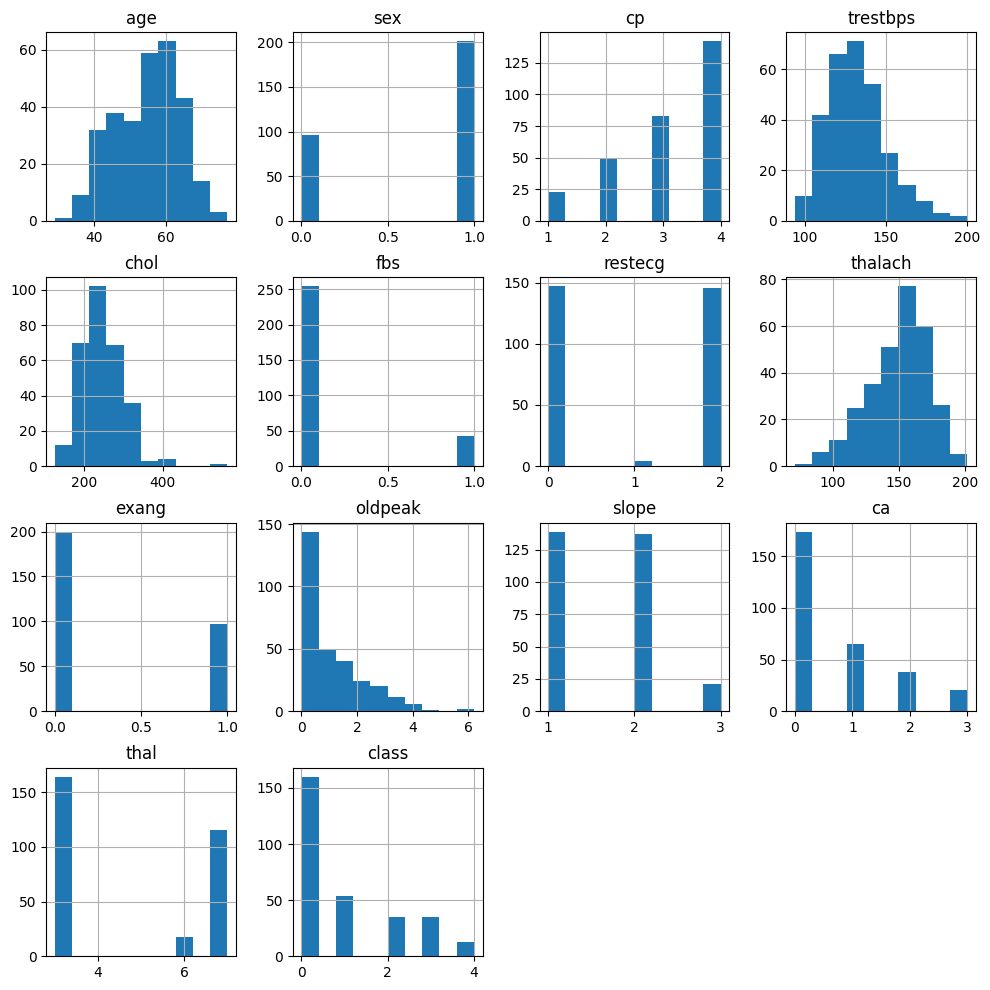

In [197]:
# plot histograms for each variable
data.hist(figsize = (12, 12))
plt.show()

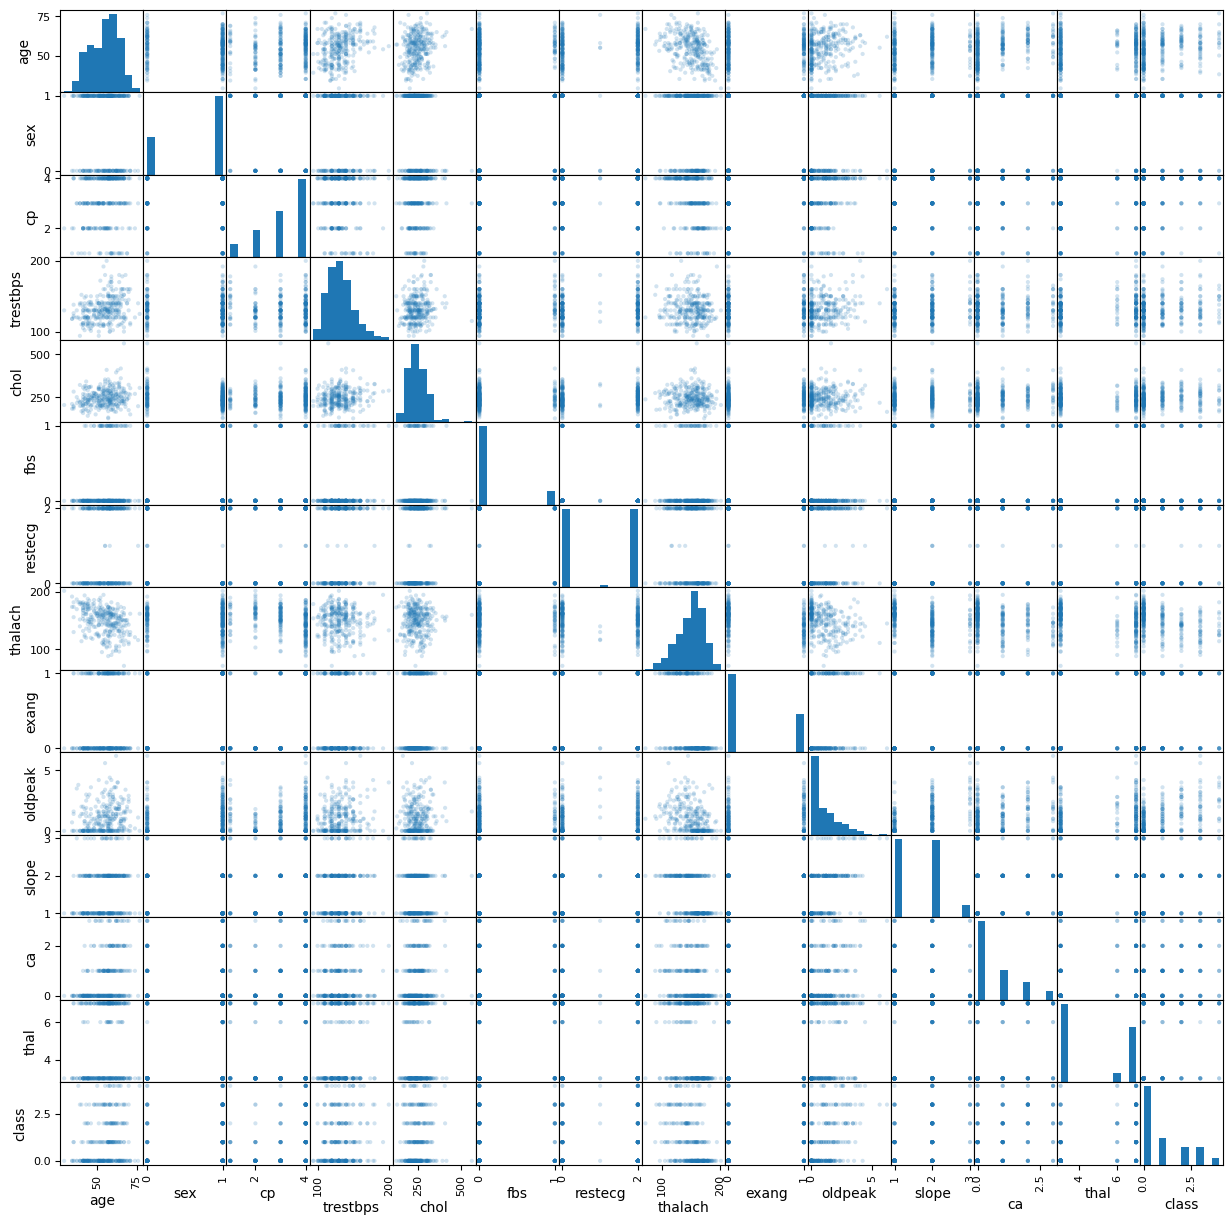

In [198]:
scatter_matrix(data, alpha=0.2, figsize=(15, 15), diagonal='hist',range_padding=0.1)
plt.show()

### 2. Create Training and Testing Datasets
 We use Sklearn's train_test_split() function to generate a training dataset and testing dataset with an 80/20 split. 

The class values in this dataset contain multiple types of heart disease with values ranging from 0 (healthy) to 4 (severe heart disease). We will need to encode our class data to categorical labels. we use a one hot encoding.

In [199]:
# create X and Y datasets for training
from sklearn import model_selection

X = np.array(data.drop(['class'], axis=1))
y = np.array(data['class'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)

In [200]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [201]:
# convert the data to categorical labels
from keras.utils import to_categorical

Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
print (Y_train.shape)
print (Y_train[:10])

(237, 5)
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


### 3. Building and Training the Neural Network

We use keras to build a simple neural network with one hidden layer. Since this is a categorical classification problem, we will use a softmax activation function in the final layer of our network and a categorical_crossentropy loss during our training phase.

In [202]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

# Define a function to build the Keras model
def create_model():
    # Create model
    model = Sequential()
    model.add(Input(shape=(13,)))
    model.add(Dense(8, kernel_initializer='he_normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='he_normal', activation='relu'))
    model.add(Dense(5, activation='softmax'))
    
    # Compile model
    adam = Adam(learning_rate=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

# Create the model
model = create_model()

# Print the model summary
model.summary()


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_33 (Dense)                │ (None, 8)              │           112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 5)              │            25 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 173 (692.00 B)

 Trainable params: 173 (692.00 B)

 Non-trainable params: 0 (0.00 B)

In [203]:
# fit the model to the training data
model.fit(X_train, Y_train, epochs=100, batch_size=10, verbose = 1)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 884us/step - accuracy: 0.0986 - loss: 1.8804     
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step - accuracy: 0.1224 - loss: 1.7446
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step - accuracy: 0.1556 - loss: 1.7202
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step - accuracy: 0.2385 - loss: 1.6231
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - accuracy: 0.3468 - loss: 1.5723
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step - accuracy: 0.4346 - loss: 1.5263
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step - accuracy: 0.3795 - loss: 1.5461
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - accuracy: 0.4897 - loss: 1.4934
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step - accuracy: 0.4519 - loss: 1.4976
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - accuracy: 0.4977 - loss: 1.4535
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - accuracy: 0.5216 - loss: 1.4103
Epoch 12/100
24/24 ━━━━━━━━━━━━━━━━━

In [204]:
# generate classification report using predictions for categorical model
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

categorical_pred = np.argmax(model.predict(X_test), axis=1)
cm = confusion_matrix(y_test, categorical_pred)


print('Results for Categorical Model')
print(cm)
print(accuracy_score(y_test, categorical_pred))
print(classification_report(y_test, categorical_pred))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Results for Categorical Model
[[32  4  0  0  0]
 [ 4  2  2  0  0]
 [ 2  3  1  0  0]
 [ 0  4  3  0  0]
 [ 0  2  1  0  0]]
0.5833333333333334
              precision    recall  f1-score   support

           0       0.84      0.89      0.86        36
           1       0.13      0.25      0.17         8
           2       0.14      0.17      0.15         6
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         3

    accuracy                           0.58        60
   macro avg       0.22      0.26      0.24        60
weighted avg       0.54      0.58      0.56        60



C:\Users\adrian\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\adrian\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\adrian\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

### 4. Improving Results - A Binary Classification Problem

Even though the results are primising, we stil have a fairly large error. Maybe it is difficult to distinguish between the different severity levels of heart disease (classes 1 - 4). We will convert the data to a binary classification problem - heart disease or no heart disease.

In [205]:
# convert into binary classification problem - heart disease or no heart disease
Y_train_binary = y_train.copy()
Y_test_binary = y_test.copy()

Y_train_binary[Y_train_binary > 0] = 1
Y_test_binary[Y_test_binary > 0] = 1

print (Y_train_binary[:20])

[0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1]


In [206]:
# Define a new Keras model for binary classification
def create_binary_model():
    # Create model
    model = Sequential()
    model.add(Input(shape=(13,)))
    model.add(Dense(8, kernel_initializer='he_normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='he_normal', activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    adam = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

# Create the binary classification model
binary_model = create_binary_model()

# Print the model summary
print(binary_model.summary())


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 8)              │           112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 153 (612.00 B)

 Trainable params: 153 (612.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [207]:
# fit the binary model on the training data
binary_model.fit(X_train, Y_train_binary, epochs=100, batch_size=10, verbose = 1)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2625 - loss: 1.1387   
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - accuracy: 0.2784 - loss: 1.0448
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - accuracy: 0.2585 - loss: 0.9881
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - accuracy: 0.2796 - loss: 0.9115   
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - accuracy: 0.4081 - loss: 0.7998
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - accuracy: 0.4239 - loss: 0.7946
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - accuracy: 0.3660 - loss: 0.7902
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - accuracy: 0.4510 - loss: 0.7367
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - accuracy: 0.4750 - loss: 0.7358
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step - accuracy: 0.6006 - loss: 0.6929
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - accuracy: 0.5206 - loss: 0.6966
Epoch 12/100
24/24 ━━━━━━━━━━━━━━━━━━

### 5. Creating classical models

We will create several classification models to compare with our neural network.

- Logistic regression
- Naive Bayes
- K-NN
- Random forest
- SVM

In [208]:
# Training the Logistic Regression model on the Training set
from sklearn.linear_model import LogisticRegression
classifierLogReg = LogisticRegression()
classifierLogReg.fit(X_train, Y_train_binary)

LogisticRegression()

In [209]:
# Training the Naive Bayes model on the Training set
from sklearn.naive_bayes import GaussianNB
classifierNB = GaussianNB()
classifierNB.fit(X_train, Y_train_binary)

GaussianNB()

In [210]:
# Training the K-NN model on the Training set
from sklearn.neighbors import KNeighborsClassifier
classifierKNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifierKNN.fit(X_train, Y_train_binary)

KNeighborsClassifier()

In [211]:
# Training the Random Forest Classification model on the Training set
from sklearn.ensemble import RandomForestClassifier
classifierRF = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
classifierRF.fit(X_train, Y_train_binary)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [212]:
# Training the SVM model on the Training set
from sklearn.svm import SVC
classifierSVC = SVC(kernel = 'linear')
classifierSVC.fit(X_train, Y_train_binary)

SVC(kernel='linear')

### 6. Results and Metrics

 If our model's cannot generalize to data that wasn't used to train them, they won't provide any utility. That is why we are going to evaluate all our models using the test data. We will make predictions and calculate performance metrics using Sklearn.

In [213]:
# generate classification report for the categorical model
categorical_pred = np.argmax(model.predict(X_test), axis=1)
cm = confusion_matrix(y_test, categorical_pred)


print('Results for Categorical Model')
print(cm)
print(accuracy_score(y_test, categorical_pred))
print(classification_report(y_test, categorical_pred))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Results for Categorical Model
[[32  4  0  0  0]
 [ 4  2  2  0  0]
 [ 2  3  1  0  0]
 [ 0  4  3  0  0]
 [ 0  2  1  0  0]]
0.5833333333333334
              precision    recall  f1-score   support

           0       0.84      0.89      0.86        36
           1       0.13      0.25      0.17         8
           2       0.14      0.17      0.15         6
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         3

    accuracy                           0.58        60
   macro avg       0.22      0.26      0.24        60
weighted avg       0.54      0.58      0.56        60



C:\Users\adrian\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\adrian\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\adrian\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

In [214]:
# generate classification report for the binary model 
binary_pred = np.round(binary_model.predict(X_test)).astype(int)
cm = confusion_matrix(Y_test_binary, binary_pred)


print('Results for Binary Model')
print(cm)
print(accuracy_score(Y_test_binary, binary_pred))
print(classification_report(Y_test_binary, binary_pred))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Results for Binary Model
[[31  5]
 [ 7 17]]
0.8
              precision    recall  f1-score   support

           0       0.82      0.86      0.84        36
           1       0.77      0.71      0.74        24

    accuracy                           0.80        60
   macro avg       0.79      0.78      0.79        60
weighted avg       0.80      0.80      0.80        60



In [215]:
# generate classification report for the Logistic Regression model 
y_pred = classifierLogReg.predict(X_test)
cm = confusion_matrix(Y_test_binary, binary_pred)

print('Results for the LogReg Model')
print(cm)
print(accuracy_score(Y_test_binary, y_pred))
print(classification_report(Y_test_binary, y_pred))

Results for the LogReg Model
[[31  5]
 [ 7 17]]
0.8166666666666667
              precision    recall  f1-score   support

           0       0.80      0.92      0.86        36
           1       0.84      0.67      0.74        24

    accuracy                           0.82        60
   macro avg       0.82      0.79      0.80        60
weighted avg       0.82      0.82      0.81        60



In [216]:
# generate classification report for the Naive Bayes model 
y_pred = classifierNB.predict(X_test)
cm = confusion_matrix(Y_test_binary, binary_pred)

print('Results for the Naive Bayes Model')
print(cm)
print(accuracy_score(Y_test_binary, y_pred))
print(classification_report(Y_test_binary, y_pred))

Results for the Naive Bayes Model
[[31  5]
 [ 7 17]]
0.85
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        36
           1       0.86      0.75      0.80        24

    accuracy                           0.85        60
   macro avg       0.85      0.83      0.84        60
weighted avg       0.85      0.85      0.85        60



In [217]:
# generate classification report for the K-Nearest-Neighbors model 
y_pred = classifierKNN.predict(X_test)
cm = confusion_matrix(Y_test_binary, binary_pred)

print('Results for the K-NN Model')
print(cm)
print(accuracy_score(Y_test_binary, y_pred))
print(classification_report(Y_test_binary, y_pred))

Results for the K-NN Model
[[31  5]
 [ 7 17]]
0.8166666666666667
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        36
           1       0.78      0.75      0.77        24

    accuracy                           0.82        60
   macro avg       0.81      0.81      0.81        60
weighted avg       0.82      0.82      0.82        60



In [218]:
# generate classification report for the Random Forest model 
y_pred = classifierRF.predict(X_test)
cm = confusion_matrix(Y_test_binary, binary_pred)

print('Results for the Random Forest Model')
print(cm)
print(accuracy_score(Y_test_binary, y_pred))
print(classification_report(Y_test_binary, y_pred))

Results for the Random Forest Model
[[31  5]
 [ 7 17]]
0.8333333333333334
              precision    recall  f1-score   support

           0       0.84      0.89      0.86        36
           1       0.82      0.75      0.78        24

    accuracy                           0.83        60
   macro avg       0.83      0.82      0.82        60
weighted avg       0.83      0.83      0.83        60



In [219]:
# generate classification report for the Support Vector Machine model 
y_pred = classifierSVC.predict(X_test)
cm = confusion_matrix(Y_test_binary, binary_pred)

print('Results for the SVC Model')
print(cm)
print(accuracy_score(Y_test_binary, y_pred))
print(classification_report(Y_test_binary, y_pred))

Results for the SVC Model
[[31  5]
 [ 7 17]]
0.8
              precision    recall  f1-score   support

           0       0.79      0.92      0.85        36
           1       0.83      0.62      0.71        24

    accuracy                           0.80        60
   macro avg       0.81      0.77      0.78        60
weighted avg       0.80      0.80      0.79        60

